<a href="https://colab.research.google.com/github/AhnJG/AI-Project/blob/master/Colab/intro_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=pandas-colab&hl=ko#scrollTo=WrkBjfz5kEQu

In [3]:
# from __future__ import print_function

import pandas as pd
print(pd.__version__)

0.25.3


Pandas의 기본 데이터 구조는 두 가지 클래스로 구현됩니다.

DataFrame은 행 및 이름 지정된 열이 포함된 관계형 데이터 테이블이라고 생각할 수 있습니다.
Series는 하나의 열입니다. DataFrame에는 하나 이상의 Series와 각 Series의 이름이 포함됩니다.


In [7]:
pd.Series(['seoul', 'busan', 'daegu'])

0    seoul
1    busan
2    daegu
dtype: object

In [8]:
city = pd.Series(['seoul', 'busan', 'daejeon'])
population = pd.Series([1234, 123, 12])

pd.DataFrame({'City Name': city, 'Population': population})

,City Name,Population
0,seoul,1234
1,busan,123
2,daejeon,12


하지만 대부분의 경우 전체 파일을 DataFrame으로 로드합니다. 다음 예는 캘리포니아 부동산 데이터가 있는 파일을 로드합니다. 다음 셀을 실행하여 데이터에 로드하고 기능 정의를 만들어 보세요.

In [9]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


위의 예에서는 DataFrame.describe를 사용하여 DataFrame에 관한 흥미로운 통계를 보여줍니다. 또 다른 유용한 함수는 DataFrame.head로, DataFrame 레코드 중 처음 몇 개만 표시합니다.

In [10]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Pandas의 또 다른 강력한 기능은 그래핑입니다. 예를 들어 DataFrame.hist를 사용하면 한 열에서 값의 분포를 빠르게 검토할 수 있습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f314fa13320>]],
      dtype=object)

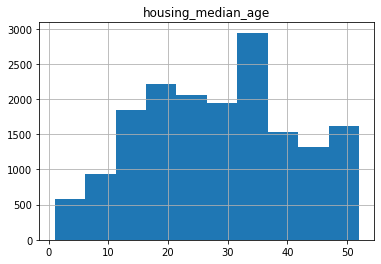

In [11]:
california_housing_dataframe.hist('housing_median_age')

익숙한 Python dict/list 작업을 사용하여 DataFrame 데이터에 액세스할 수 있습니다.

In [16]:
cities = pd.DataFrame({'City Name': city, 'Population': population})
print(type(cities['City Name']))
print(cities['City Name'])
print(cities['Population'])

<class 'pandas.core.series.Series'>
0      seoul
1      busan
2    daejeon
Name: City Name, dtype: object
0    1234
1     123
2      12
Name: Population, dtype: int64


Python의 기본 산술 연산을 Series에 적용할 수도 있습니다. 예를 들면 다음과 같습니다.
NumPy는 유명한 계산과학 툴킷입니다. Pandas Series는 대부분의 NumPy 함수에 인수로 사용할 수 있습니다.

In [19]:
population / 1000.

0    1.234
1    0.123
2    0.012
dtype: float64

In [20]:
import numpy as np
np.log(population)

0    7.118016
1    4.812184
2    2.484907
dtype: float64

더 복잡한 단일 열 변환에는 Series.apply를 사용할 수 있습니다. Python map 함수처럼, Series.apply는 인수로 lambda 함수를 허용하며, 이는 각 값에 적용됩니다.

아래의 예에서는 인구가 백만 명을 초과하는지 나타내는 새 Series를 만듭니다.

In [23]:
res = population.apply(lambda val: val > 1000)
print(res)

0     True
1    False
2    False
dtype: bool


DataFrames 수정 역시 간단합니다. 예를 들어 다음 코드는 기존 DataFrame에 두 개의 Series를 추가합니다.

In [26]:
cities['area square miles'] = pd.Series([12.34, 32.14, 43.23])
cities['population density'] = cities['Population'] / cities['area square miles']
cities

,City Name,Population,area square miles,population density
0,seoul,1234,12.34,100.000000
1,busan,123,32.14,3.827007
2,daejeon,12,43.23,0.277585


 ## 실습 #1

다음 두 명제 *모두* True인 경우에만 True인 새 부울 열을 추가하여 `도시` 테이블을 수정합니다.

  * 도시 이름은 성인의 이름을 본따서 지었다.
  * 도시 면적이 130제곱킬로미터보다 넓다.

**참고:** 부울 `Series`는 기존 부울 연산자가 아닌 비트 연산자를 사용하여 결합할 수 있습니다. 예를 들어 *logical and*를 실행할 때 `and` 대신 `&`를 사용합니다.

**참고:** 스페인어에서 "San"은 "성인"의 의미입니다.

In [34]:
import pandas as pd
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
Square_miles = pd.Series([46.87, 176.53, 97.92])

city_DataFrame = pd.DataFrame({'City': city_names, 'Square': Square_miles})
print(city_DataFrame)

city_DataFrame['new Col'] = city_DataFrame['City'].apply(lambda val: 'San' in val) & city_DataFrame['Square'].apply(lambda val: val > 130)
print(city_DataFrame)

            City  Square
0  San Francisco   46.87
1       San Jose  176.53
2     Sacramento   97.92
            City  Square  new Col
0  San Francisco   46.87    False
1       San Jose  176.53     True
2     Sacramento   97.92    False


 ## 색인
`Series`와 `DataFrame` 객체 모두 식별자 값을 각 `Series` 항목이나 `DataFrame` 행에 할당하는 `index` 속성을 정의합니다. 

기본적으로 생성 시 *Pandas*는 소스 데이터의 순서를 나타내는 색인 값을 할당합니다. 생성된 이후 색인 값은 고정됩니다. 즉, 데이터의 순서가 재정렬될 때 변하지 않습니다.

In [35]:
city.index

RangeIndex(start=0, stop=3, step=1)

In [36]:
cities.index

RangeIndex(start=0, stop=3, step=1)

 `DataFrame.reindex`를 호출하여 수동으로 행의 순서를 재정렬합니다. 예를 들어 다음은 도시 이름을 기준으로 분류하는 것과 효과가 같습니다.

In [37]:
cities.reindex([2, 0, 1])

,City Name,Population,area square miles,population density
2,daejeon,12,43.23,0.277585
0,seoul,1234,12.34,100.000000
1,busan,123,32.14,3.827007


 색인 재생성은 `DataFrame`을 섞기(임의 설정하기) 위한 좋은 방법입니다. 아래의 예에서는 배열처럼 된 색인을 NumPy의 `random.permutation` 함수에 전달하여 값을 섞습니다. 이렇게 섞인 배열로 `reindex`를 호출하면 `DataFrame` 행도 같은 방식으로 섞입니다.
다음 셀을 여러 번 실행해 보세요.

In [41]:
cities.reindex(np.random.permutation(cities.index))

,City Name,Population,area square miles,population density
1,busan,123,32.14,3.827007
2,daejeon,12,43.23,0.277585
0,seoul,1234,12.34,100.000000


 ## 실습 #2

`reindex` 메서드는 원래 `DataFrame`의 색인 값에 없는 색인 값을 허용합니다. 메서드를 실행해보고 이런 값을 사용하면 어떤 결과가 나오는지 확인해보세요. 왜 이런 값이 허용된다고 생각하나요?

In [45]:
cities.reindex([4,1,2,0])

,City Name,Population,area square miles,population density
4,NaN,NaN,NaN,NaN
1,busan,123.0,32.14,3.827007
2,daejeon,12.0,43.23,0.277585
0,seoul,1234.0,12.34,100.000000


 색인은 보통 실제 데이터에서 가져온 문자열이기 때문에 이 동작이 바람직합니다([*Pandas* 색인 재생성 문서](http://Pandas.pydata.org/Pandas-docs/stable/generated/Pandas.DataFrame.reindex.html)에서 색인 값이 브라우저 이름인 예제 참조).

이 경우 \'누락된\' 색인을 허용하면 외부 목록을 사용하여 쉽게 색인을 다시 생성할 수 있으므로, 입력 처리에 대해 걱정하지 않아도 됩니다.